In [79]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
import pmdarima as pm

In [7]:
riders = pd.read_csv('portland_v2.csv', sep=';', header =0, index_col=0, parse_dates =[0])
riders.head()


,riders
Month,
1973-01-01,64800
1973-02-01,64600
1973-03-01,63900
1973-04-01,65400
1973-05-01,63000


In [8]:
riders.index

DatetimeIndex(['1973-01-01', '1973-02-01', '1973-03-01', '1973-04-01',
               '1973-05-01', '1973-06-01', '1973-07-01', '1973-08-01',
               '1973-09-01', '1973-10-01',
               ...
               '1980-09-01', '1980-10-01', '1980-11-01', '1980-12-01',
               '1981-01-01', '1981-02-01', '1981-03-01', '1981-04-01',
               '1981-05-01', '1981-06-01'],
              dtype='datetime64[ns]', name='Month', length=102, freq=None)

In [13]:
riders.shape

(102, 1)

In [17]:
riders.tail()

,riders
Month,
1981-02-01,144000
1981-03-01,141400
1981-04-01,142400
1981-05-01,140800
1981-06-01,133700


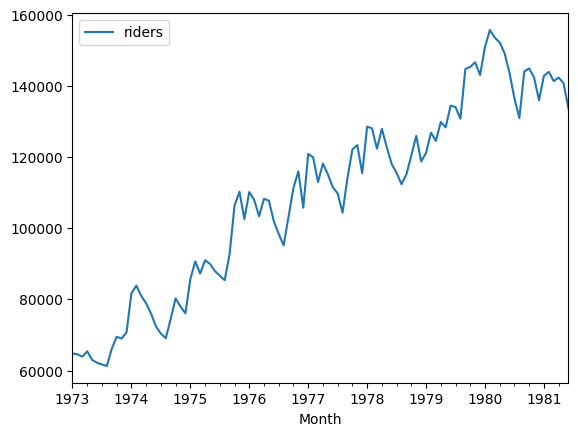

In [9]:
riders.plot()
plt.show();

In [10]:
riders.describe().T

,count,mean,std,min,25%,50%,75%,max
riders,102.0,109140.196078,27075.648552,61300.0,85950.0,112700.0,129575.0,155800.0


**Effectuer une décomposition**

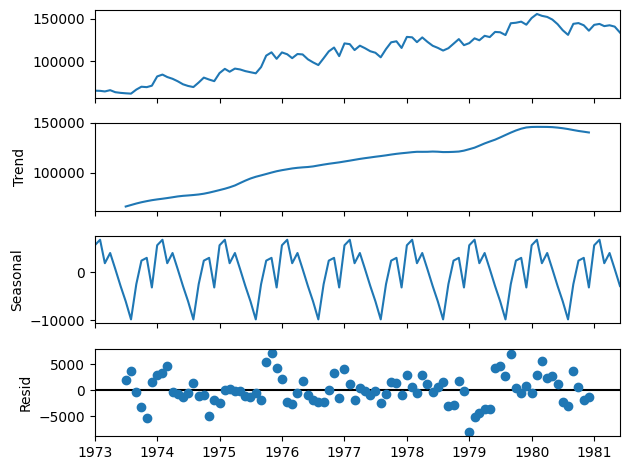

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose
decom=seasonal_decompose(riders)
decom.plot()
plt.show();

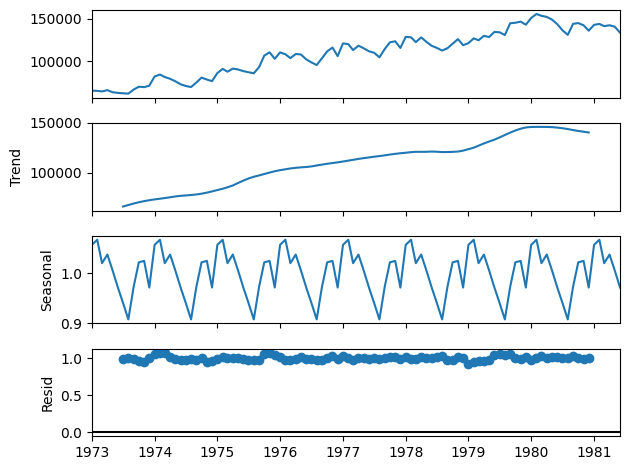

In [18]:
# Modèle multiplicative
res = seasonal_decompose(riders, model = 'multiplicative')
res.plot()
plt.show()

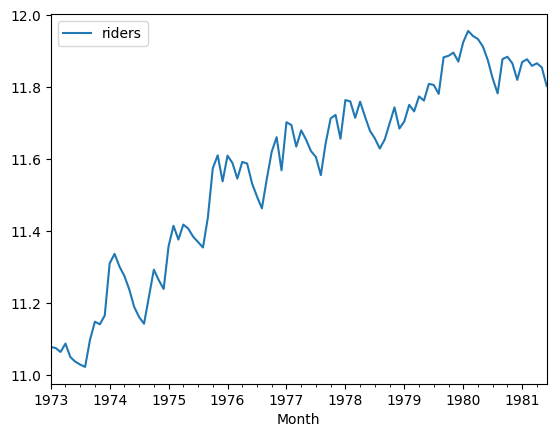

In [19]:
riderslog = np.log(riders)
riderslog.plot()
plt.show()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

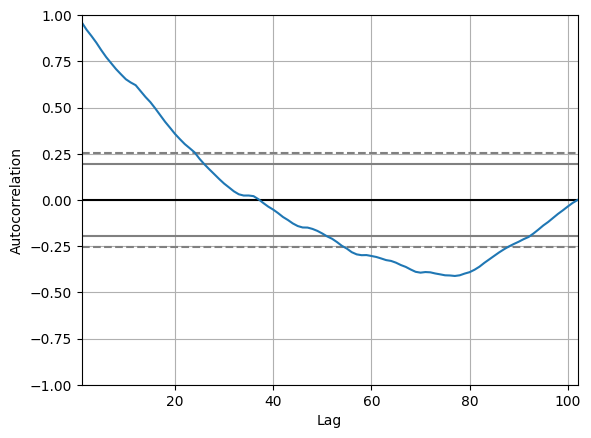

In [23]:
pd.plotting.autocorrelation_plot(riderslog);


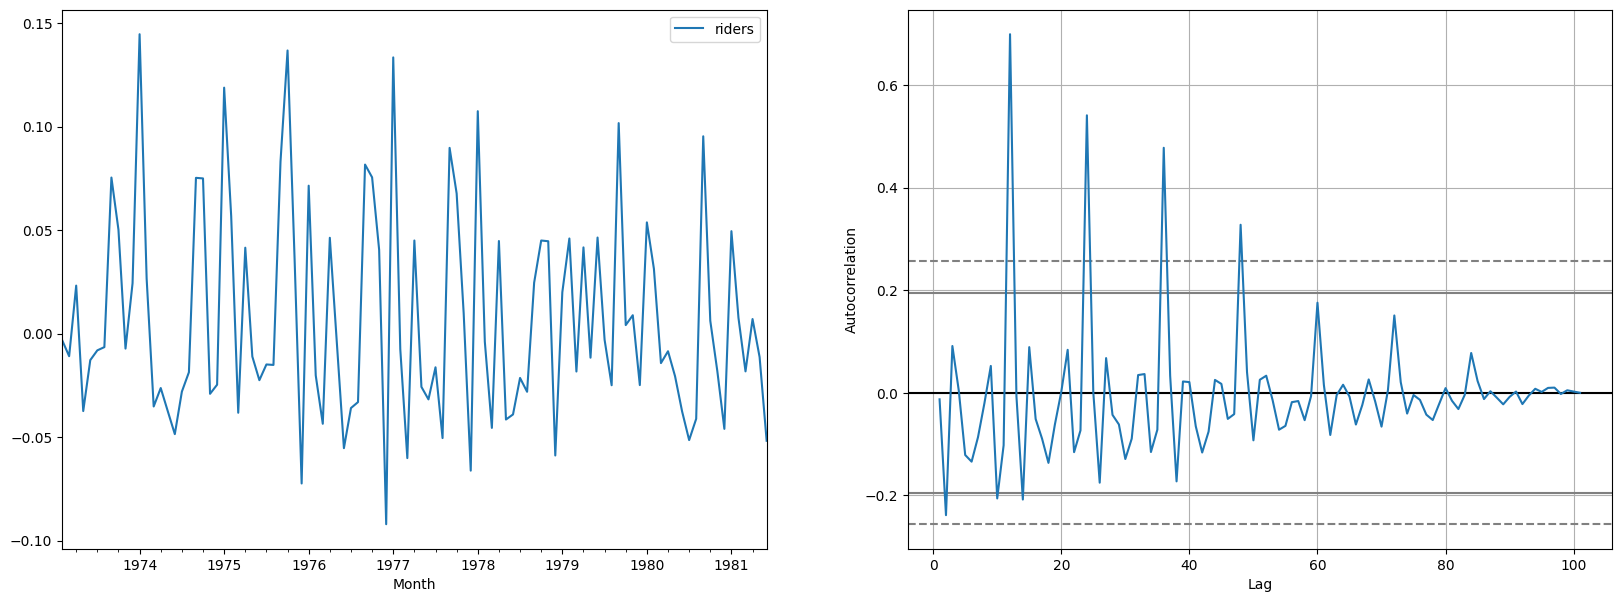

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,7)) # Création de la figure et des axes

riderslog_1 = riderslog.diff().dropna() # Différenciation ordre 1

riderslog_1.plot(ax = ax1) #Série temporelle différenciée

pd.plotting.autocorrelation_plot(riderslog_1, ax = ax2); #Autocorrélogramme de la série différenciée


In [27]:
_, p_value, _, _, _, _  = adfuller(riderslog_1)
p_value  # La série n'est pas stationnaire.

0.43051401785242144

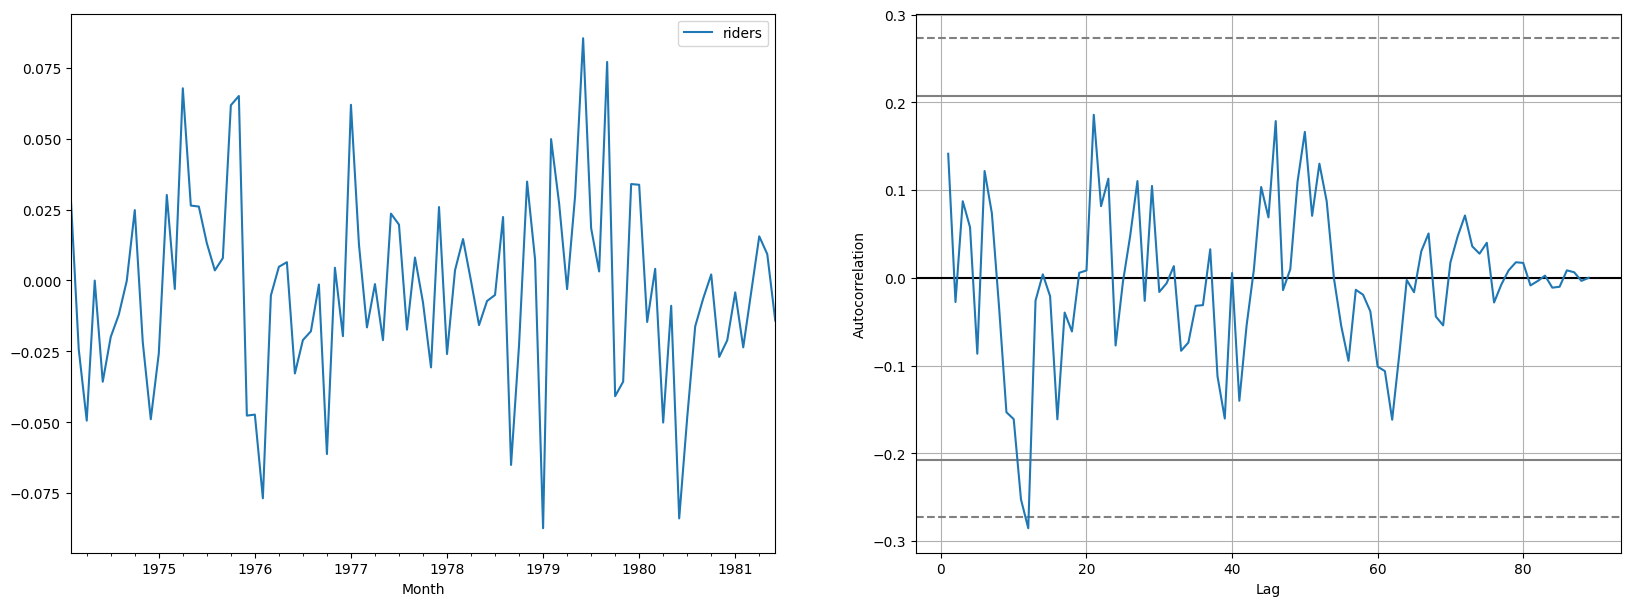

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,7)) #Création de la figure et des axes

riderslog_2 = riderslog_1.diff(periods = 12).dropna() #Différenciation d'ordre 12

riderslog_2.plot(ax = ax1) #Série doublement différenciée

pd.plotting.autocorrelation_plot(riderslog_2, ax = ax2); #Autocorrélogramme de la série

In [29]:
_, p_value, _, _, _, _  = adfuller(riderslog_2)
p_value  # La série est stationnaire.

1.4525703195870265e-12

Donc d = 1 et D = 1

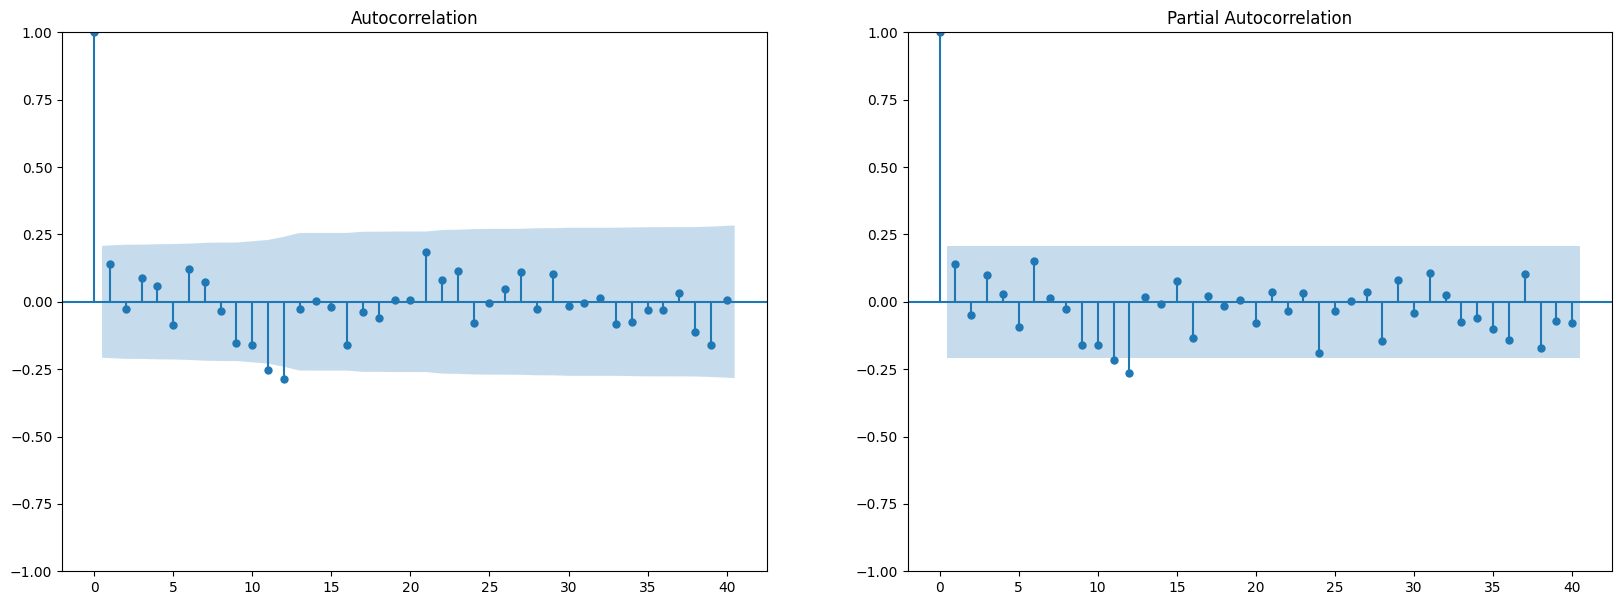

In [33]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,7))

plot_acf(riderslog_2, lags = 40, ax=ax1)
plot_pacf(riderslog_2, lags = 40, ax=ax2)
plt.show()

In [42]:
stepwise_fit = auto_arima(riderslog, seasonal=True, m=12, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=-392.091, Time=1.04 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-312.424, Time=0.05 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-393.112, Time=0.51 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-356.770, Time=0.62 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-312.409, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=-310.440, Time=0.07 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=-393.947, Time=1.07 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=-393.284, Time=1.53 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=-395.545, Time=0.88 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=-356.512, Time=0.40 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=-395.734, Time=1.87 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=-370.592, Time=0.88 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=-392.529, Time=2.02 sec
 ARIMA(0,1,0)(1,0,2)[12] intercept   : AIC=-396.670, Time=1.45 sec
 ARIMA(0,1,0)(0,0,2

In [43]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  102
Model:             SARIMAX(0, 1, 0)x(1, 0, [1], 12)   Log Likelihood                 202.272
Date:                              Wed, 16 Aug 2023   AIC                           -398.544
Time:                                      23:10:45   BIC                           -390.699
Sample:                                  01-01-1973   HQIC                          -395.368
                                       - 06-01-1981                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.9142      0.035     25.892      0.000       0.845       0.983
ma.S.L12      -0.3948      0.119     -3.328      0.001      -0.627      -0.162
sigma2         0.0009      0.000      7.419      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.85   Jarque-Bera (JB):                 3.75
Prob(Q):                              0.36   Prob(JB):                         0.15
Heteroskedasticity (H):               1.02   Skew:                             0.40
Prob(H) (two-sided):                  0.96   Kurtosis:                         3.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [48]:
model = sm.tsa.SARIMAX(riderslog,order=(0,1,0),seasonal_order=(1,0,1,12))
sarima=model.fit()
print(sarima.summary())

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                       
Dep. Variable:                               riders   No. Observations:                  102
Model:             SARIMAX(0, 1, 0)x(1, 0, [1], 12)   Log Likelihood                 202.272
Date:                              Wed, 16 Aug 2023   AIC                           -398.544
Time:                                      23:13:33   BIC                           -390.699
Sample:                                  01-01-1973   HQIC                          -395.368
                                       - 06-01-1981                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.9142      0.035     25.892      0.000       0.845       0.983
ma.S.L12      -0.39

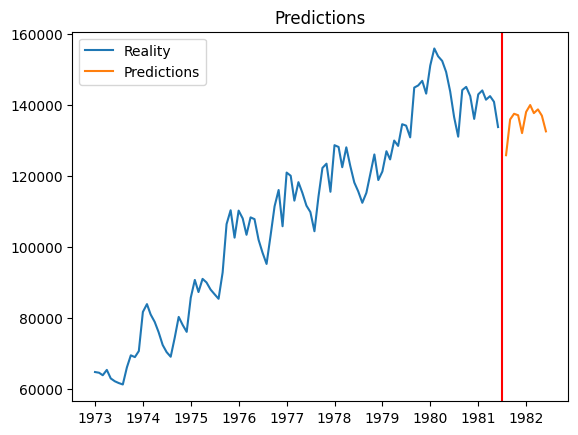

In [68]:
import datetime
pred = np.exp(sarima.predict(103,113))
plt.plot(riders, label = 'Reality')
plt.plot(pred, label = 'Predictions')

plt.title('Predictions')

plt.legend()

plt.axvline(x= datetime.date(1981,7,1), color='red');

In [72]:
riders_8182 = pd.read_csv('portland_8182.csv',sep=';', header = 0, index_col=0, parse_dates =[0])
riders_8182.head()


,riders
Month,
1981-07-01,125800
1981-08-01,121400
1981-09-01,132600
1981-10-01,141700
1981-11-01,141700


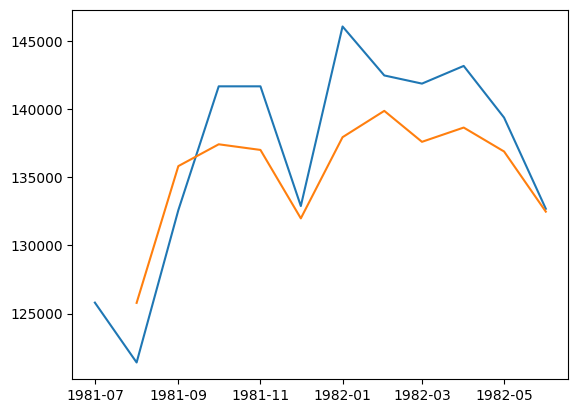

In [84]:
plt.plot(riders_8182, label = 'Reality')
plt.plot(pred, label = 'Predictions')

Ce n'est pas trop loin de la réalité

In [97]:
 mape = np.mean(np.abs((riders_8182['riders'] - pred) / riders_8182['riders'])) * 100

In [98]:
mape

2.596591437565089

Puisque MAPE est inférieur à 100%, on conclure ainsi sous-évaluation des valeurs